In [17]:
import torch
from deeplearn_tools import *
from py09_FashionMNIST_Dataset import load_data_fashion_mnist,get_fashion_mnist_labels,image_show
from torch import nn

In [2]:
net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

In [3]:
def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [4]:
loss = nn.CrossEntropyLoss()

In [5]:
Optimizer = torch.optim.SGD(net.parameters(),lr=0.1)

In [6]:
def accuracy(y_hat,y):
    y_hat = y_hat.argmax(dim=1)
    cmp = y_hat.type(y.dtype) == y.reshape(y_hat.shape)
    return float(cmp.sum())

In [7]:
def evaluate_accuracy(net,data_iter):
    """计算在指定数据集的精度"""
    if isinstance(net,torch.nn.Module):
        # 评估模式，不会计算梯度
        net.eval()
    metric = Accumulator(2)
    for X,y in data_iter:
        X = X.reshape(-1,28*28)
        y = y.reshape(-1,1)
        metric.add(accuracy(net(X),y),y.numel())
    return metric[0]/metric[1]

In [8]:
batch_size = 256
train_iter,test_iter = load_data_fashion_mnist(batch_size)

In [9]:
for X, y in train_iter:
    y_hat = net(X)
    break
y_hat.shape,y.shape,y_hat.reshape(-1).shape

(torch.Size([256, 10]), torch.Size([256]), torch.Size([2560]))

In [10]:
def train(net, train_iter, loss, Optimizer):
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(Optimizer, torch.optim.Optimizer):
            Optimizer.zero_grad()
            l.backward()
            Optimizer.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

In [11]:
def train_vis(net, train_iter, test_iter,loss, Optimizer,num_epochs):
    animator =Animator(xlabel="epoch",xlim=[1,num_epochs],ylim=[0.3, 0.9],legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_loss,train_acc = train(net, train_iter, loss, Optimizer)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch+1,(train_loss,train_acc,test_acc))
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

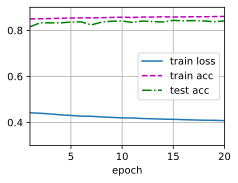

In [19]:
num_epochs = 20
train_vis(net, train_iter, test_iter,loss, Optimizer,num_epochs)

In [20]:
def predict(net,test_iter,n=6):
    for X,y in test_iter:
        break
    X = X.reshape(-1,28*28)
    y = y.reshape(-1,1)
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true,pred in zip(trues,preds)]
    image_show(X[0:n].reshape((-1,28,28)),1,n,titles=titles[0:n])

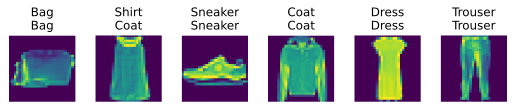

In [21]:
predict(net,test_iter,n=6)